In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
data_train = pd.read_csv('../data/ml/hotel_reservations_train.csv')
data_test = pd.read_csv('../data/ml/hotel_reservations_test.csv')

X_train = data_train.drop('booking_status', axis=1)
y_train = data_train['booking_status']

X_test = data_test.drop('booking_status', axis=1)
y_test = data_test['booking_status']

## Information Gain

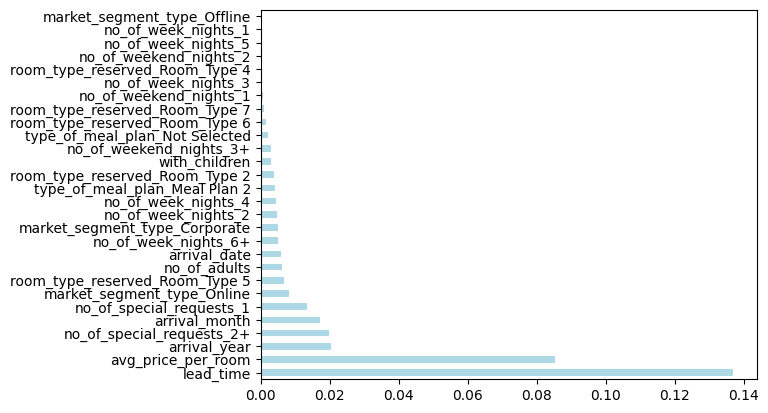

In [8]:
from sklearn.feature_selection import mutual_info_classif

# Calculate the mutual information between each feature and the target
importances = mutual_info_classif(X_train, y_train)

# Create a Series and sort the values
feat_importances = pd.Series(importances, X_train.columns)
sorted_importance = feat_importances.sort_values(ascending=False)
sorted_importance.plot(kind='barh', color='lightblue')
plt.show()

In [13]:
# Select top 6 features
selected_features = sorted_importance.index[:6]

# Create new datasets with the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [16]:
# Train a Random Forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model = RandomForestClassifier(
    n_estimators=100,                   # Number of trees in the forest
    criterion='gini',                   # Function to measure the quality of a split
    max_depth=None,                     # Maximum depth of the tree
    min_samples_split=2,                # Minimum number of samples required to split an internal node
    min_samples_leaf=1,                 # Minimum number of samples required to be at a leaf node
    min_weight_fraction_leaf=0.0,       # Minimum weighted fraction of the sum total of weights
    max_features=6,                     # Number of features to consider when looking for the best split
    max_leaf_nodes=None,                # Grow trees with max_leaf_nodes in best-first fashion
    min_impurity_decrease=0.0,          # A node will be split if this split induces a decrease of the impurity greater than or equal to this value
    bootstrap=True,                     # Whether bootstrap samples are used when building trees
    oob_score=False,                    # Whether to use out-of-bag samples to estimate the generalization accuracy
    n_jobs=None,                        # The number of jobs to run in parallel
    random_state=42,                    # Seed of the pseudo random number generator
    verbose=1,                          # Controls the verbosity when fitting and predicting
    warm_start=False,                   # When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble
    class_weight=None,                  # Weights associated with classes in the form {class_label: weight}
    ccp_alpha=0.0,                      # Complexity parameter used for Minimal Cost-Complexity Pruning
    max_samples=None                    # If bootstrap is True, the number of samples to draw from X to train each base estimator
)

model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)
print(classification_report(y_test, y_pred))

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.1s


              precision    recall  f1-score   support

           0       0.88      0.91      0.90      4256
           1       0.81      0.76      0.79      2140

    accuracy                           0.86      6396
   macro avg       0.85      0.84      0.84      6396
weighted avg       0.86      0.86      0.86      6396



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
